In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
import seaborn as sns
import tensorflow as tf # This code has been tested with TensorFlow 1.6


In [2]:
SBI=pd.read_csv('data/SBI/daily_NSE_SBIN.csv')
SBI.set_index('timestamp',inplace=True)
AXISBANK=pd.read_csv('data/SBI/daily_NSE_AXISBANK.csv')
AXISBANK.set_index('timestamp',inplace=True)
BANKBARODA=pd.read_csv('data/SBI/daily_NSE_BANKBARODA.csv')
BANKBARODA.set_index('timestamp',inplace=True)
HDFCBANK=pd.read_csv('data/SBI/daily_NSE_HDFCBANK.csv')
HDFCBANK.set_index('timestamp',inplace=True)
ICICIBANK=pd.read_csv('data/SBI/daily_NSE_ICICIBANK.csv')
ICICIBANK.set_index('timestamp',inplace=True)
PNB=pd.read_csv('data/SBI/daily_NSE_PNB.csv')
PNB.set_index('timestamp',inplace=True)



/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


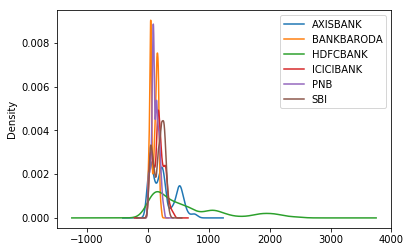

In [3]:
SBI['SBI']=SBI['close']
AXISBANK['AXISBANK']=AXISBANK['open']
BANKBARODA['BANKBARODA']=BANKBARODA['open']
HDFCBANK['HDFCBANK']=HDFCBANK['open']
ICICIBANK['ICICIBANK']=ICICIBANK['open']
PNB['PNB']=PNB['open']

dataSet=pd.concat([SBI, AXISBANK, BANKBARODA,HDFCBANK,ICICIBANK,PNB], axis=1)
dataSet=dataSet[['AXISBANK','BANKBARODA','HDFCBANK','ICICIBANK','PNB','SBI']]
dataSet=dataSet.dropna()
dataSet.plot(kind='kde')

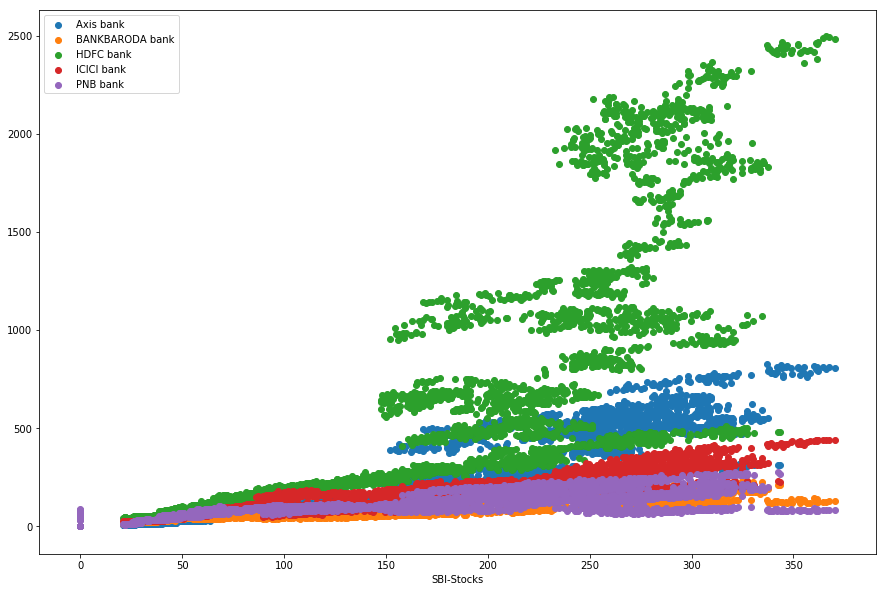

In [4]:
plt.figure(figsize=(15,10))
plt.scatter(dataSet['SBI'],dataSet['AXISBANK'],label='Axis bank')
plt.scatter(dataSet['SBI'],dataSet['BANKBARODA'],label='BANKBARODA bank')
plt.scatter(dataSet['SBI'],dataSet['HDFCBANK'],label='HDFC bank')
plt.scatter(dataSet['SBI'],dataSet['ICICIBANK'],label='ICICI bank')
plt.scatter(dataSet['SBI'],dataSet['PNB'],label='PNB bank')
plt.xlabel('SBI-Stocks')
plt.legend()
plt.show()

In [5]:
results = sm.ols(formula='SBI ~ AXISBANK', data=dataSet).fit()

In [6]:
Y_pred = results.predict(dataSet[["AXISBANK"]])

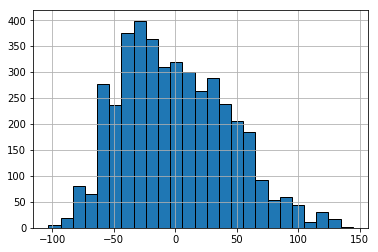

In [7]:

residual = dataSet["SBI"].values-Y_pred
residual.hist(bins=25, ec='k')

In [8]:
x_data=dataSet[['AXISBANK','BANKBARODA','HDFCBANK','ICICIBANK','PNB']]
y_data=dataSet[['SBI']]


# Summary- Mean,STD

In [9]:
dataSet.describe()

,AXISBANK,BANKBARODA,HDFCBANK,ICICIBANK,PNB,SBI
count,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000
mean,255.421767,104.665804,644.109045,173.802724,119.242167,177.524005
std,204.332194,57.684393,622.068333,94.318766,57.932881,91.221197
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,70.000000,47.900000,167.460000,98.545400,80.597500,89.155675
50%,217.610000,114.105000,436.605000,171.636000,107.200000,193.497500
75%,449.787500,156.070000,1005.000000,238.307000,160.957500,253.962500
max,824.000000,228.400000,2499.000000,439.500000,275.310000,370.650000


### Plot without Standardizer

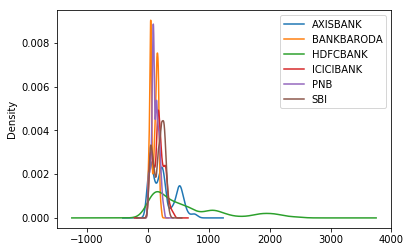

In [10]:
dataSet.plot(kind='kde')

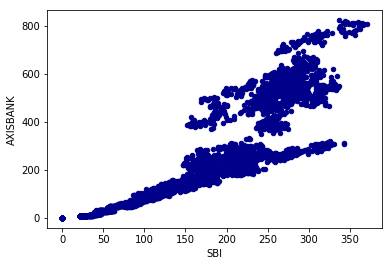

In [11]:
dataSet.plot.scatter(x='SBI',y='AXISBANK',c='DarkBlue')

### Hist without Standardizer

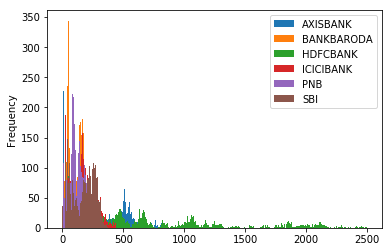

In [12]:
dataSet.plot(kind='hist',bins=500)

## StandardScaler


In [14]:
from sklearn import preprocessing

standardScaler = preprocessing.StandardScaler()
standardScaler_df = pd.DataFrame(standardScaler.fit_transform(dataSet))

In [15]:
standardScaler_df.describe()

,0,1,2,3,4,5
count,4.240000e+03,4.240000e+03,4.240000e+03,4240.000000,4.240000e+03,4240.000000
mean,1.072517e-16,1.072517e-16,5.362587e-17,0.000000,-2.145035e-16,0.000000
std,1.000118e+00,1.000118e+00,1.000118e+00,1.000118,1.000118e+00,1.000118
min,-1.250179e+00,-1.814670e+00,-1.035553e+00,-1.842934,-2.058524e+00,-1.946312
25%,-9.075596e-01,-9.841917e-01,-7.663230e-01,-0.797998,-6.671380e-01,-0.968840
50%,-1.850723e-01,1.636545e-01,-3.336105e-01,-0.022975,-2.078886e-01,0.175128
75%,9.513364e-01,8.912334e-01,5.802152e-01,0.683977,7.201481e-01,0.838045
max,2.782945e+00,2.145273e+00,2.982164e+00,2.817346,2.694260e+00,2.117367


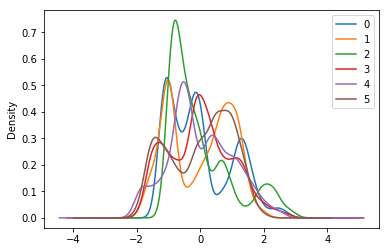

In [16]:
standardScaler_df.plot(kind='kde')

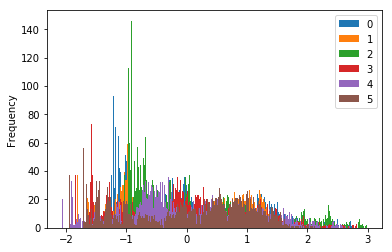

In [17]:
standardScaler_df.plot(kind='hist',bins=500)

# Robust Scaler

In [18]:
robustScaler = preprocessing.RobustScaler()
robustScaler_df = pd.DataFrame(robustScaler.fit_transform(dataSet))


### RobustScaler-Summary

In [19]:
robustScaler_df.describe()

,0,1,2,3,4,5
count,4.240000e+03,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000
mean,9.956032e-02,-0.087263,0.247754,0.015503,0.149853,-0.096923
std,5.380172e-01,0.533275,0.742733,0.674855,0.720917,0.553504
min,-5.729783e-01,-1.054867,-0.521295,-1.228063,-1.333997,-1.174087
25%,-3.886647e-01,-0.612046,-0.321352,-0.522966,-0.331042,-0.633116
50%,-3.741683e-17,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6.113353e-01,0.387954,0.678648,0.477034,0.668958,0.366884
max,1.596656e+00,1.056624,2.462444,1.916578,2.091961,1.074910


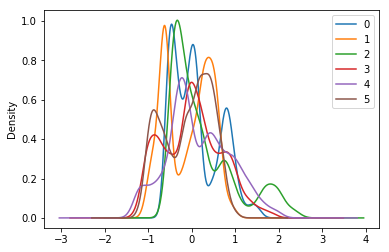

In [20]:
robustScaler_df.plot(kind='kde')

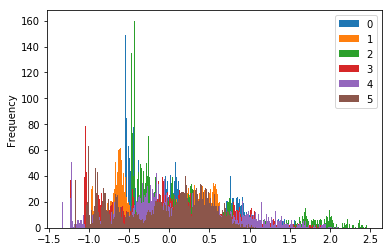

In [21]:
robustScaler_df.plot(kind='hist',bins=500)

# MinMaxScaller

In [22]:
minMaxScaler = preprocessing.MinMaxScaler()
minMaxScaler_df = pd.DataFrame(minMaxScaler.fit_transform(dataSet))

In [23]:
minMaxScaler_df.describe()

,0,1,2,3,4,5
count,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000
mean,0.309978,0.458257,0.257747,0.395456,0.433120,0.478953
std,0.247976,0.252559,0.248927,0.214605,0.210428,0.246111
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.084951,0.209720,0.067011,0.224222,0.292752,0.240539
50%,0.264090,0.499584,0.174712,0.390526,0.389379,0.522049
75%,0.545859,0.683319,0.402161,0.542223,0.584641,0.685181
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


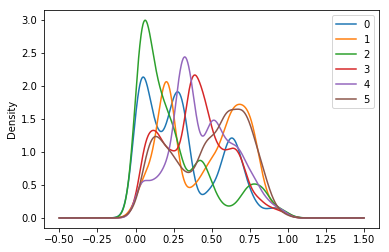

In [24]:
minMaxScaler_df.plot(kind='kde')

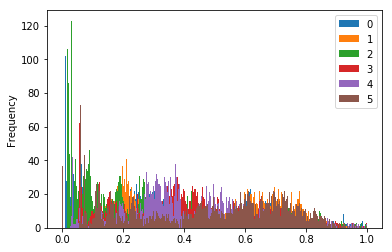

In [25]:
minMaxScaler_df.plot(kind='hist',bins=500)

#  Normalizer

In [26]:
normalizer = preprocessing.Normalizer()
normalizer_df = pd.DataFrame(normalizer.fit_transform(dataSet))

In [27]:
normalizer_df.describe()

,0,1,2,3,4,5
count,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000
mean,0.310856,0.179835,0.744806,0.295878,0.244035,0.303596
std,0.084620,0.071809,0.134387,0.110090,0.135175,0.107494
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.264510,0.136559,0.647675,0.224114,0.125828,0.209094
50%,0.319452,0.180282,0.722834,0.269221,0.256866,0.335452
75%,0.377499,0.231056,0.857417,0.402434,0.341782,0.395912
max,0.476561,0.375647,0.957917,0.559359,1.000000,0.477373


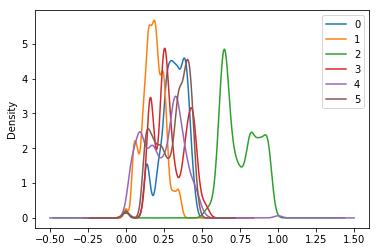

In [28]:
normalizer_df.plot(kind='kde')

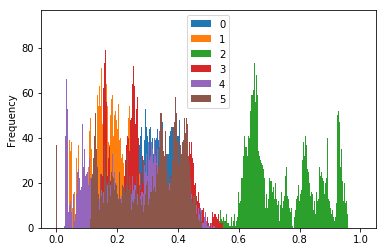

In [29]:
normalizer_df.plot(kind='hist',bins=500)

## MaxAbsScaler

In [39]:
maxAbsScaler = preprocessing.MaxAbsScaler()
maxAbsScaler_df = pd.DataFrame(maxAbsScaler.fit_transform(dataSet))

In [40]:
print(x_data.shape)
print(y_data.shape)

(4240, 5)
(4240, 1)


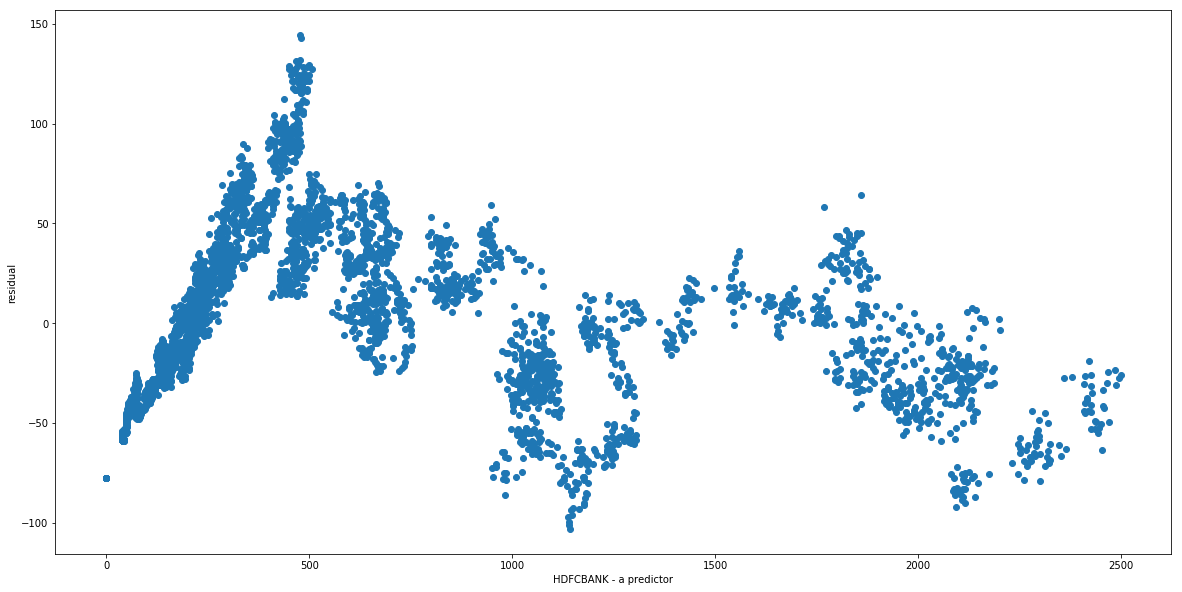

In [41]:
plt.figure(figsize=(20,10))
plt.scatter(dataSet[["HDFCBANK"]],residual)
plt.xlabel("HDFCBANK - a predictor")
plt.ylabel("residual")
plt.show()

In [42]:
results = sm.ols(formula='SBI~AXISBANK+BANKBARODA+HDFCBANK+ICICIBANK+PNB',data =dataSet).fit()
results

In [43]:
Y_ols_pred=results.predict(x_data)


In [44]:
x_data.columns.values
dataSet
dataSet.reset_index(inplace=True)
dataSet

,index,AXISBANK,BANKBARODA,HDFCBANK,ICICIBANK,PNB,SBI
0,2002-07-01,7.61,12.80,40.0000,25.4182,9.60,22.8379
1,2002-07-02,7.88,12.08,42.6000,25.4545,9.60,22.8143
2,2002-07-03,7.80,12.38,42.0000,26.7273,9.46,22.5879
3,2002-07-04,7.80,12.23,42.0600,28.1818,9.56,22.6728
4,2002-07-05,8.02,12.19,43.6900,27.0909,9.90,22.7672
5,2002-07-08,7.90,11.80,42.3500,27.8818,9.90,22.8190
6,2002-07-09,8.16,11.82,42.4600,27.4000,9.90,22.7200
7,2002-07-10,8.39,12.20,42.0000,27.2364,9.76,22.9747
8,2002-07-11,8.51,12.19,42.2000,27.0818,9.70,22.1775
9,2002-07-12,8.19,12.20,42.2000,27.2727,9.45,22.1208


In [45]:
# Training and test data
# Dimensions of dataset
dataSet=dataSet.drop(['index'],axis=1)
data=dataSet.values
n = data.shape[0]
p = data.shape[1]

train_start = 0
train_end = int(np.floor(0.8*n))
test_start = train_end
test_end = n
data_train = data[np.arange(train_start, train_end), :]
data_test = data[np.arange(test_start, test_end), :]
data_train

array([[   7.61  ,   12.8   ,   40.    ,   25.4182,    9.6   ,   22.8379],
       [   7.88  ,   12.08  ,   42.6   ,   25.4545,    9.6   ,   22.8143],
       [   7.8   ,   12.38  ,   42.    ,   26.7273,    9.46  ,   22.5879],
       ...,
       [ 400.    ,  123.55  , 1021.    ,  207.727 ,   88.65  ,  175.6   ],
       [ 419.4   ,  126.3   , 1025.7   ,  211.455 ,   89.9   ,  184.6   ],
       [ 429.75  ,  132.4   , 1039.95  ,  214.5   ,   94.    ,  182.95  ]])

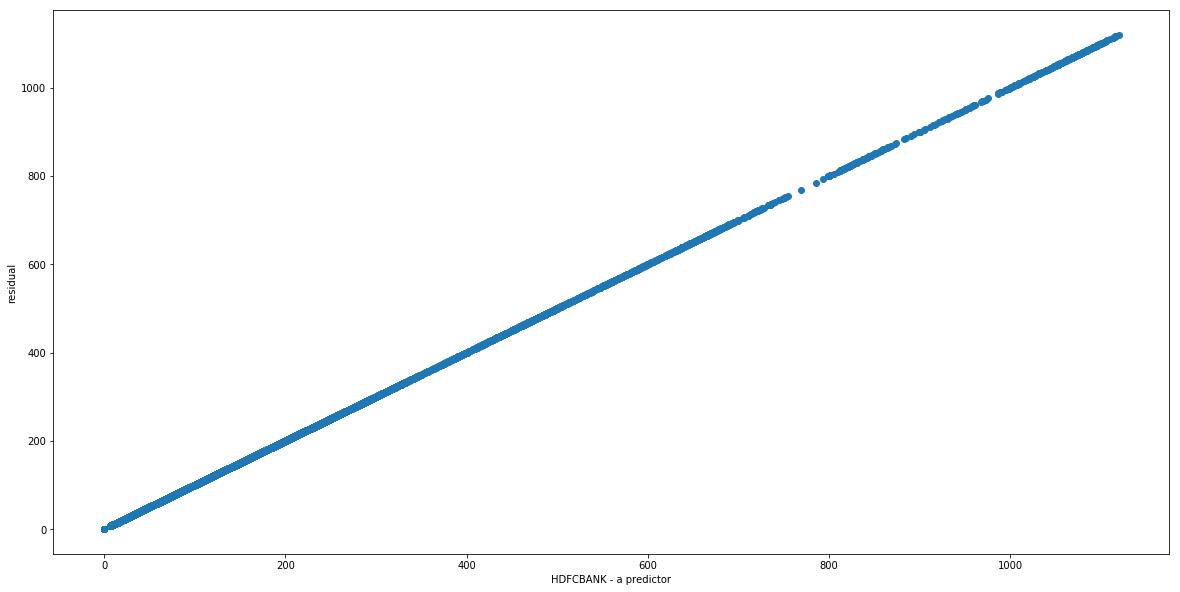

In [46]:
plt.figure(figsize=(20,10))
plt.scatter(data_train,data_train)
plt.xlabel("HDFCBANK - a predictor")
plt.ylabel("residual")
plt.show()

In [47]:
# Scale data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_train = scaler.fit_transform(data_train)
data_test = scaler.transform(data_test)
# Build X and y
X_train = data_train[:, 1:]
y_train = data_train[:, 0]
X_test = data_test[:, 1:]
y_test = data_test[:, 0]


In [48]:
y_train

array([0.0116915 , 0.01210631, 0.01198341, ..., 0.61453372, 0.64433861,
       0.66023967])

In [49]:
Y_ols_pred

2002-07-01     12.702806
2002-07-02     12.876292
2002-07-03     13.059778
2002-07-04     13.542536
2002-07-05     13.582509
2002-07-08     13.780749
2002-07-09     13.688113
2002-07-10     13.524368
2002-07-11     13.459235
2002-07-12     13.273901
2002-07-15     14.544382
2002-07-16     13.152339
2002-07-17     13.177365
2002-07-18     13.103689
2002-07-19     12.318597
2002-07-22     12.916031
2002-07-23     12.913788
2002-07-24     12.616868
2002-07-25     13.234061
2002-07-26     12.379101
2002-07-29     12.392669
2002-07-30     12.688766
2002-07-31     12.052763
2002-08-01     12.304345
2002-08-02     13.502184
2002-08-05     12.969493
2002-08-06     12.489663
2002-08-07     12.601149
2002-08-08     12.231432
2002-08-09     12.300115
                 ...    
2019-05-24    328.060322
2019-05-27    337.040197
2019-05-28    343.260478
2019-05-29    336.213465
2019-05-30    332.020618
2019-05-31    335.536221
2019-06-03    334.027933
2019-06-04    332.755053
2019-06-06    334.112186


In [50]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    SBI   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.964
Method:                 Least Squares   F-statistic:                 2.248e+04
Date:                Wed, 10 Jul 2019   Prob (F-statistic):               0.00
Time:                        18:56:28   Log-Likelihood:                -18122.
No. Observations:                4240   AIC:                         3.626e+04
Df Residuals:                    4234   BIC:                         3.629e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.3835      0.731     -3.259      0.001      -3.817      -0.950
AXISBANK       0.1391      0.006     21.436      0.000       0.126       0.152
BANKBARODA    -0.0881      0.016     -5.397      0.000      -0.120      -0.056
HDFCBANK       0.0241      0.002     15.483      0.000       0.021       0.027
ICICIBANK      0.2692      0.010     25.998      0.000       0.249       0.290
PNB            0.7653      0.013     59.119      0.000       0.740       0.791
==============================================================================
Omnibus:                       91.171   Durbin-Watson:                   0.141
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               61.691
Skew:                           0.176   Prob(JB):                     4.02e-14
Kurtosis:                       2.526   Cond. No.                     2.68e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.68e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [51]:
co_relations=dataSet.corr()

In [52]:
co_relations

,AXISBANK,BANKBARODA,HDFCBANK,ICICIBANK,PNB,SBI
AXISBANK,1.000000,0.767618,0.940925,0.943636,0.393810,0.877813
BANKBARODA,0.767618,1.000000,0.618432,0.776891,0.823702,0.901898
HDFCBANK,0.940925,0.618432,1.000000,0.887263,0.206565,0.770733
ICICIBANK,0.943636,0.776891,0.887263,1.000000,0.500752,0.918564
PNB,0.393810,0.823702,0.206565,0.500752,1.000000,0.736258
SBI,0.877813,0.901898,0.770733,0.918564,0.736258,1.000000


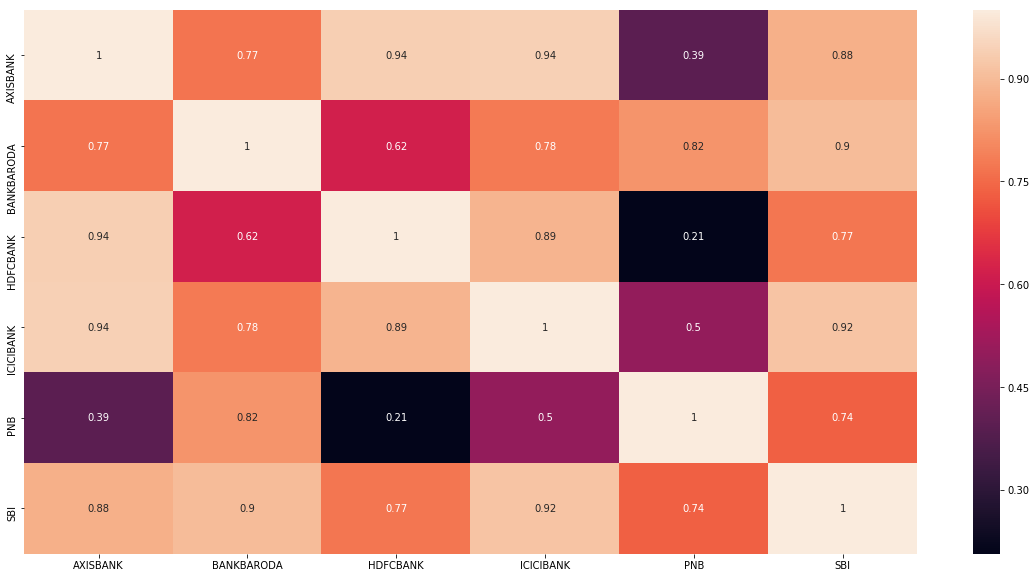

In [53]:
plt.figure(figsize=(20,10))
sns.heatmap(co_relations, annot=True)
plt.show()

## Tensorflow Starts 

In [54]:
import tensorflow as tf
import numpy as np
n=5
y_data=np.reshape(y_data, -1)
y_data


,SBI
2002-07-01,22.8379
2002-07-02,22.8143
2002-07-03,22.5879
2002-07-04,22.6728
2002-07-05,22.7672
2002-07-08,22.8190
2002-07-09,22.7200
2002-07-10,22.9747
2002-07-11,22.1775
2002-07-12,22.1208


In [55]:
# Initializers
sigma = 1
weight_initializer = tf.variance_scaling_initializer(mode="fan_avg", distribution="uniform", scale=sigma)
bias_initializer = tf.zeros_initializer()

In [56]:
# Model architecture parameters
n_stocks = 5
n_neurons_1 = 1024
n_neurons_2 = 512
n_neurons_3 = 256
n_neurons_4 = 128
n_target = 1
# Placeholder
X = tf.placeholder(dtype=tf.float32, shape=[None, n_stocks])
Y = tf.placeholder(dtype=tf.float32, shape=[None])

# Layer 1: Variables for hidden weights and biases
W_hidden_1 = tf.Variable(weight_initializer([n_stocks, n_neurons_1]))
bias_hidden_1 = tf.Variable(bias_initializer([n_neurons_1]))
# Layer 2: Variables for hidden weights and biases
W_hidden_2 = tf.Variable(weight_initializer([n_neurons_1, n_neurons_2]))
bias_hidden_2 = tf.Variable(bias_initializer([n_neurons_2]))
# Layer 3: Variables for hidden weights and biases
W_hidden_3 = tf.Variable(weight_initializer([n_neurons_2, n_neurons_3]))
bias_hidden_3 = tf.Variable(bias_initializer([n_neurons_3]))
# Layer 4: Variables for hidden weights and biases
W_hidden_4 = tf.Variable(weight_initializer([n_neurons_3, n_neurons_4]))
bias_hidden_4 = tf.Variable(bias_initializer([n_neurons_4]))

# Output layer: Variables for output weights and biases
W_out = tf.Variable(weight_initializer([n_neurons_4, n_target]))
bias_out = tf.Variable(bias_initializer([n_target]))

In [65]:
# Hidden layer
hidden_1 = tf.nn.relu(tf.add(tf.matmul(X, W_hidden_1), bias_hidden_1))
hidden_2 = tf.nn.relu(tf.add(tf.matmul(hidden_1, W_hidden_2), bias_hidden_2))
hidden_3 = tf.nn.relu(tf.add(tf.matmul(hidden_2, W_hidden_3), bias_hidden_3))
hidden_4 = tf.nn.relu(tf.add(tf.matmul(hidden_3, W_hidden_4), bias_hidden_4))

# Output layer (must be transposed)
out = tf.transpose(tf.add(tf.matmul(hidden_4, W_out), bias_out))

In [66]:
# Cost function
mse = tf.reduce_mean(tf.squared_difference(out, Y))

In [67]:
# Optimizer
opt = tf.train.AdamOptimizer().minimize(mse)

In [68]:
t=data_train[3000:3001]
print(t)
tt=t[:,:-1]
tt

X_train = data_train[:, 1:]
y_train = data_train[:, 0]
X_test = data_test[:, 1:]
y_test = data_test[:, 0]



[[0.56229836 0.73467601 0.7378953  0.73900142 0.70284407 0.75233366]]


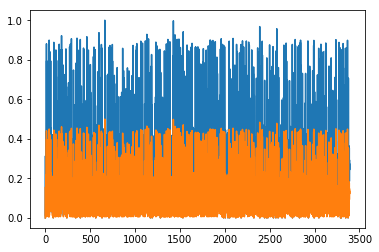

0.0005061309


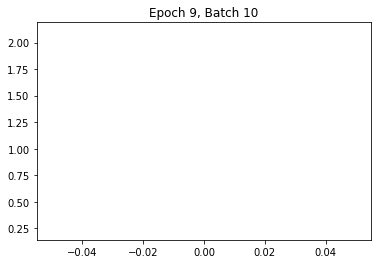

In [74]:
# Make Session
net = tf.Session()
# Run initializer
net.run(tf.global_variables_initializer())

#Setup interactive plot
plt.ion()
fig = plt.figure()
ax1 = fig.add_subplot(111)
line1, = ax1.plot(y_train)
line2, = ax1.plot(y_train*0.5)
plt.show()

# Number of epochs and batch size
epochs = 10
batch_size = 256

for e in range(epochs):

    # Shuffle training data
    shuffle_indices = np.random.permutation(np.arange(len(y_train)))
    X_train = X_train[shuffle_indices]
    y_train = y_train[shuffle_indices]

    # Minibatch training
    for i in range(0, len(y_train) // batch_size):
        start = i * batch_size
        batch_x = X_train[start:start + batch_size]
        batch_y = y_train[start:start + batch_size]
        # Run optimizer with batch
        net.run(opt, feed_dict={X: batch_x, Y: batch_y})
#        


# Show progress
        if np.mod(i, 5) == 0:
            # Prediction
            pred = net.run(out, feed_dict={X: X_test})
            plt.plot(pred)
            #print(pred)
            plt.title('Epoch ' + str(e) + ', Batch ' + str(i))
            file_name = 'img/epoch_' + str(e) + '_batch_' + str(i) + '.jpg'
            plt.savefig(file_name)
           # plt.pause(0.01)
            
mse_final = net.run(mse, feed_dict={X: X_train, Y: y_train})
print(mse_final)